In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


# Q1. Nonlinearity

# 1.1 Why might it be necessary to consider nonlinear relationships between variables?

The answer for the above question(1.1) can be found in the report


# 1.2 Write down the mathematical equation for a nonlinear model and provide an example of an application where it might be appropriate.


The answer for the above question(1.2) can be found in the report

# 1.3 Can a nonlinear model be more parsimonious than a linear model? Write down mathematical formulae for both the linear and nonlinear models to support your answer.

The answer for the above question(1.3) can be found in the report

# 1.4 Surrogate data are used for testing for nonlinearity. What characteristics are typically preserved when generating surrogates? Give the names of two surrogate techniques and describe the approaches for implementing them

The answer for the above question(1.4) can be found in the report

# 1.5 Define information, entropy and mutual information using mathematical formulas. Describe how entropy can be used for constructing a feature for measuring regularity and give an example of an application. Explain how mutual information can be used for feature selection and why it might be better than correlation.

The answer for the above question(1.5) can be found in the report

# Q2. Classification using trees

# 2.1. Decision trees are often used to transform a set of observations into a specific recommended action. Describe the components (nodes, branches) of a decision tree. Why might it be necessary to prune the tree? Why are decision trees an attractive method for classification in practical applications?

The answer for the above question(2.1) can be found in the report

# 2.2. Suppose an organization has built a rule-based classifier using domain knowledge. After collecting a large amount of data, outline the steps required to improve upon the existing approach by constructing a data-driven classifier. How would you advise to test the validity of the new model?

The answer for the above question(2.2) can be found in the report

# 2.3. Consider the challenge of classifying the likelihood of survival using the Titanic dataset. Construct a decision tree and display the structure of this tree using a graphic.

In [2]:
#leading the dataset
titanic_address="titanic3.csv"
titanic_data=pd.read_csv(titanic_address)
titanic_data=titanic_data.filter(["pclass","survived","sex","age"])

#filtering explanatory variables and dependent variable in the dataset
X=titanic_data.filter(['pclass','sex','age'])
X['sex'] = X['sex'].replace(to_replace={'male':1,'female':0})
y=titanic_data['survived']

#checking if explanatory variables contains null values and where we find it , we will replace it by the mean of that column
X.isnull().sum()
X['age']=X['age'].fillna(X['age'].mean())


# Splitting the dataset into the Training set and Test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Make an instance of the Model
classifier = DecisionTreeClassifier(random_state=0,max_depth=None) 

# Train the model on the data

classifier.fit(X_train,y_train)



DecisionTreeClassifier(random_state=0)

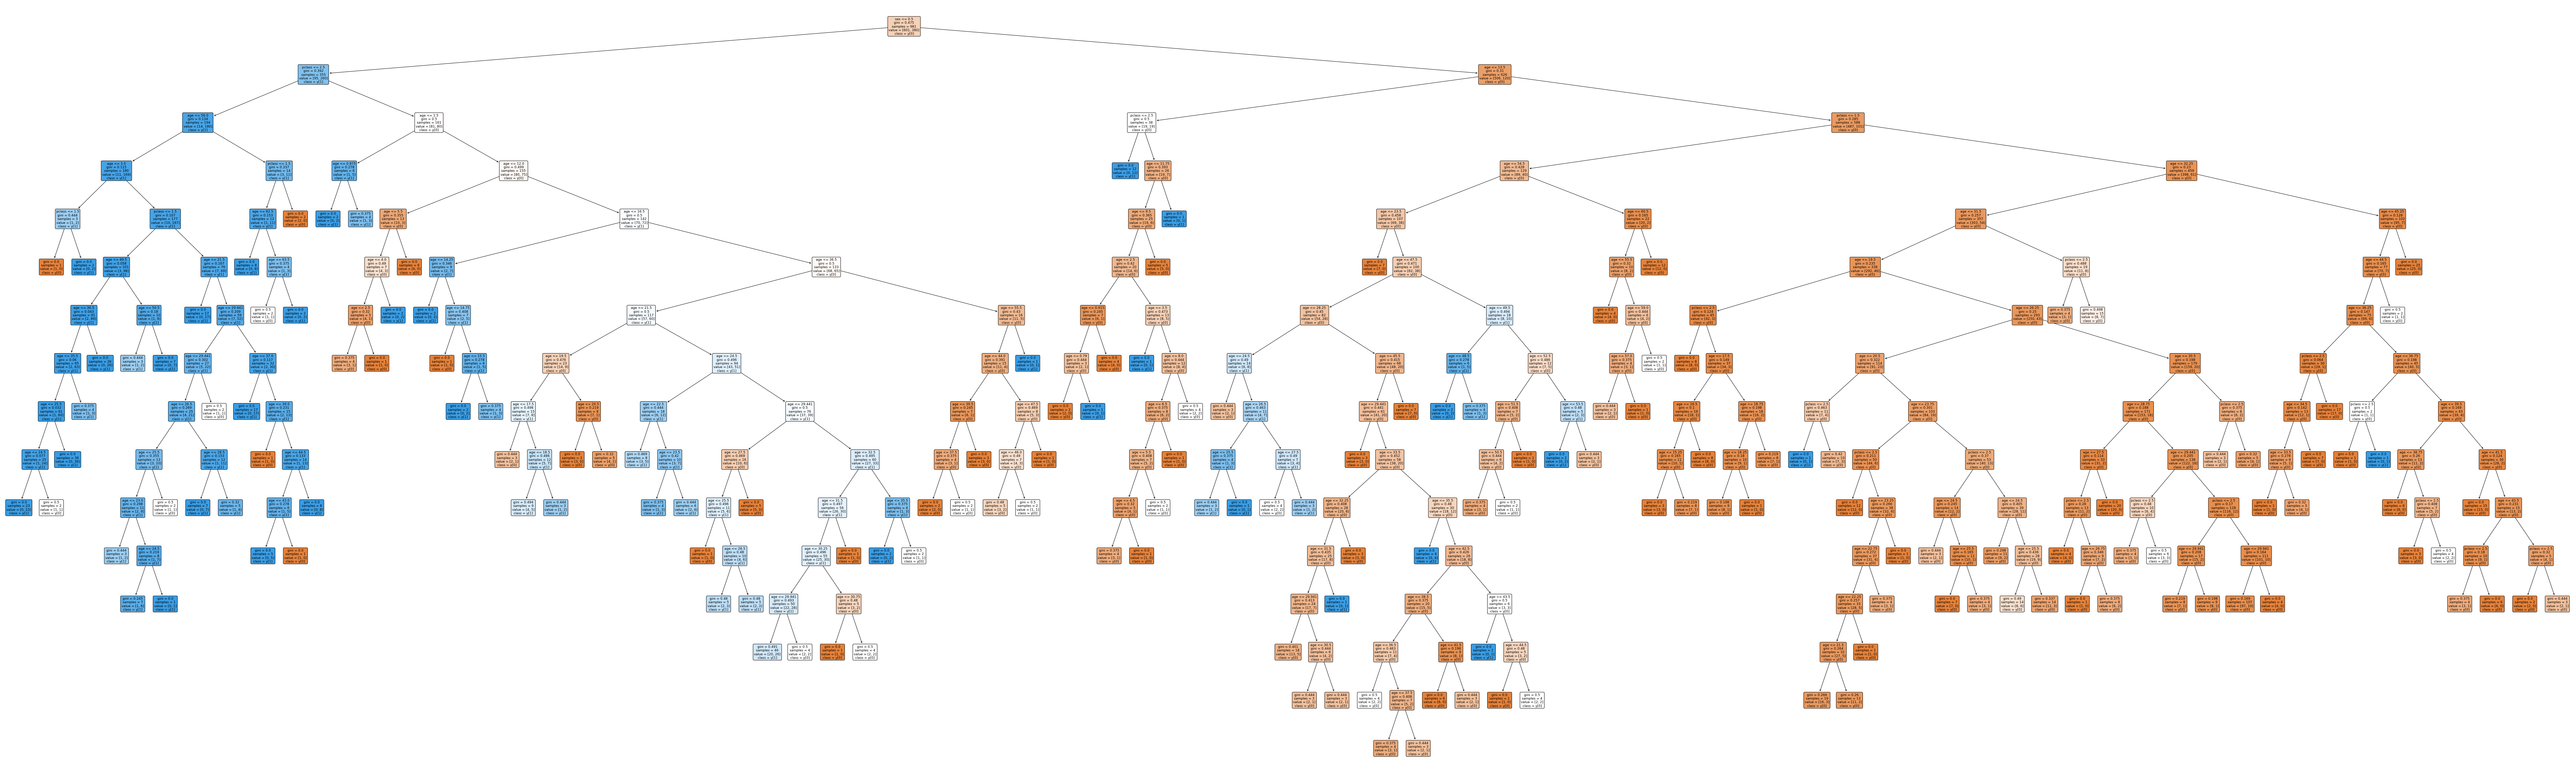

In [3]:

from sklearn.linear_model import LogisticRegression
from matplotlib import rc_params
#Visiualizing our tree

rcParams['figure.figsize']=130,40
tree.plot_tree(classifier,feature_names=X.columns,filled=True,rounded=True,class_names=True)
plt.show()


# 2.4. Evaluate the performance of the tree (before and after pruning) and provide results using cross-validation.

In [4]:
#references : https://matthewmcgonagle.github.io/blog/2018/09/13/PruningDecisionTree

#before prunning cross validation

crossValScores = cross_val_score(classifier, X, y, cv=10)
print(f"Cross-Validation Accuracy Scores before prunning :{crossValScores.mean()}")

Cross-Validation Accuracy Scores before prunning :0.7356136230182032


In [5]:
#references : https://napsterinblue.github.io/notes/machine_learning/trees/decision_tree_pruning/
#prunning

accuracy_score_list=[]
max_value=0
min_value=0

for value in range(3,20):
    prunning_classfier=DecisionTreeClassifier(random_state=0,max_depth=value)
    prunning_classfier.fit(X_train,y_train)
    prunning_cross_validation_scores=cross_val_score(prunning_classfier,X,y,cv=10)
    accuracy_score_list.append((value,prunning_cross_validation_scores.mean()))
                               
print(accuracy_score_list)

[(3, 0.722607163828538), (4, 0.7180270111567821), (5, 0.7340751614797417), (6, 0.7210980622431004), (7, 0.7241514973576042), (8, 0.7203347034644745), (9, 0.7264591896652965), (10, 0.7379095713446858), (11, 0.7310393423370523), (12, 0.7325601879036994), (13, 0.7317968291250734), (14, 0.7333235466823254), (15, 0.7356136230182032), (16, 0.7356136230182032), (17, 0.7356136230182032), (18, 0.7356136230182032), (19, 0.7356136230182032)]


It is obviously that the depth with high accuracy score is 15 with Cross-Validation Accuracy Score = 0.7954545454545454 . then I will produce a tree with 15 depths

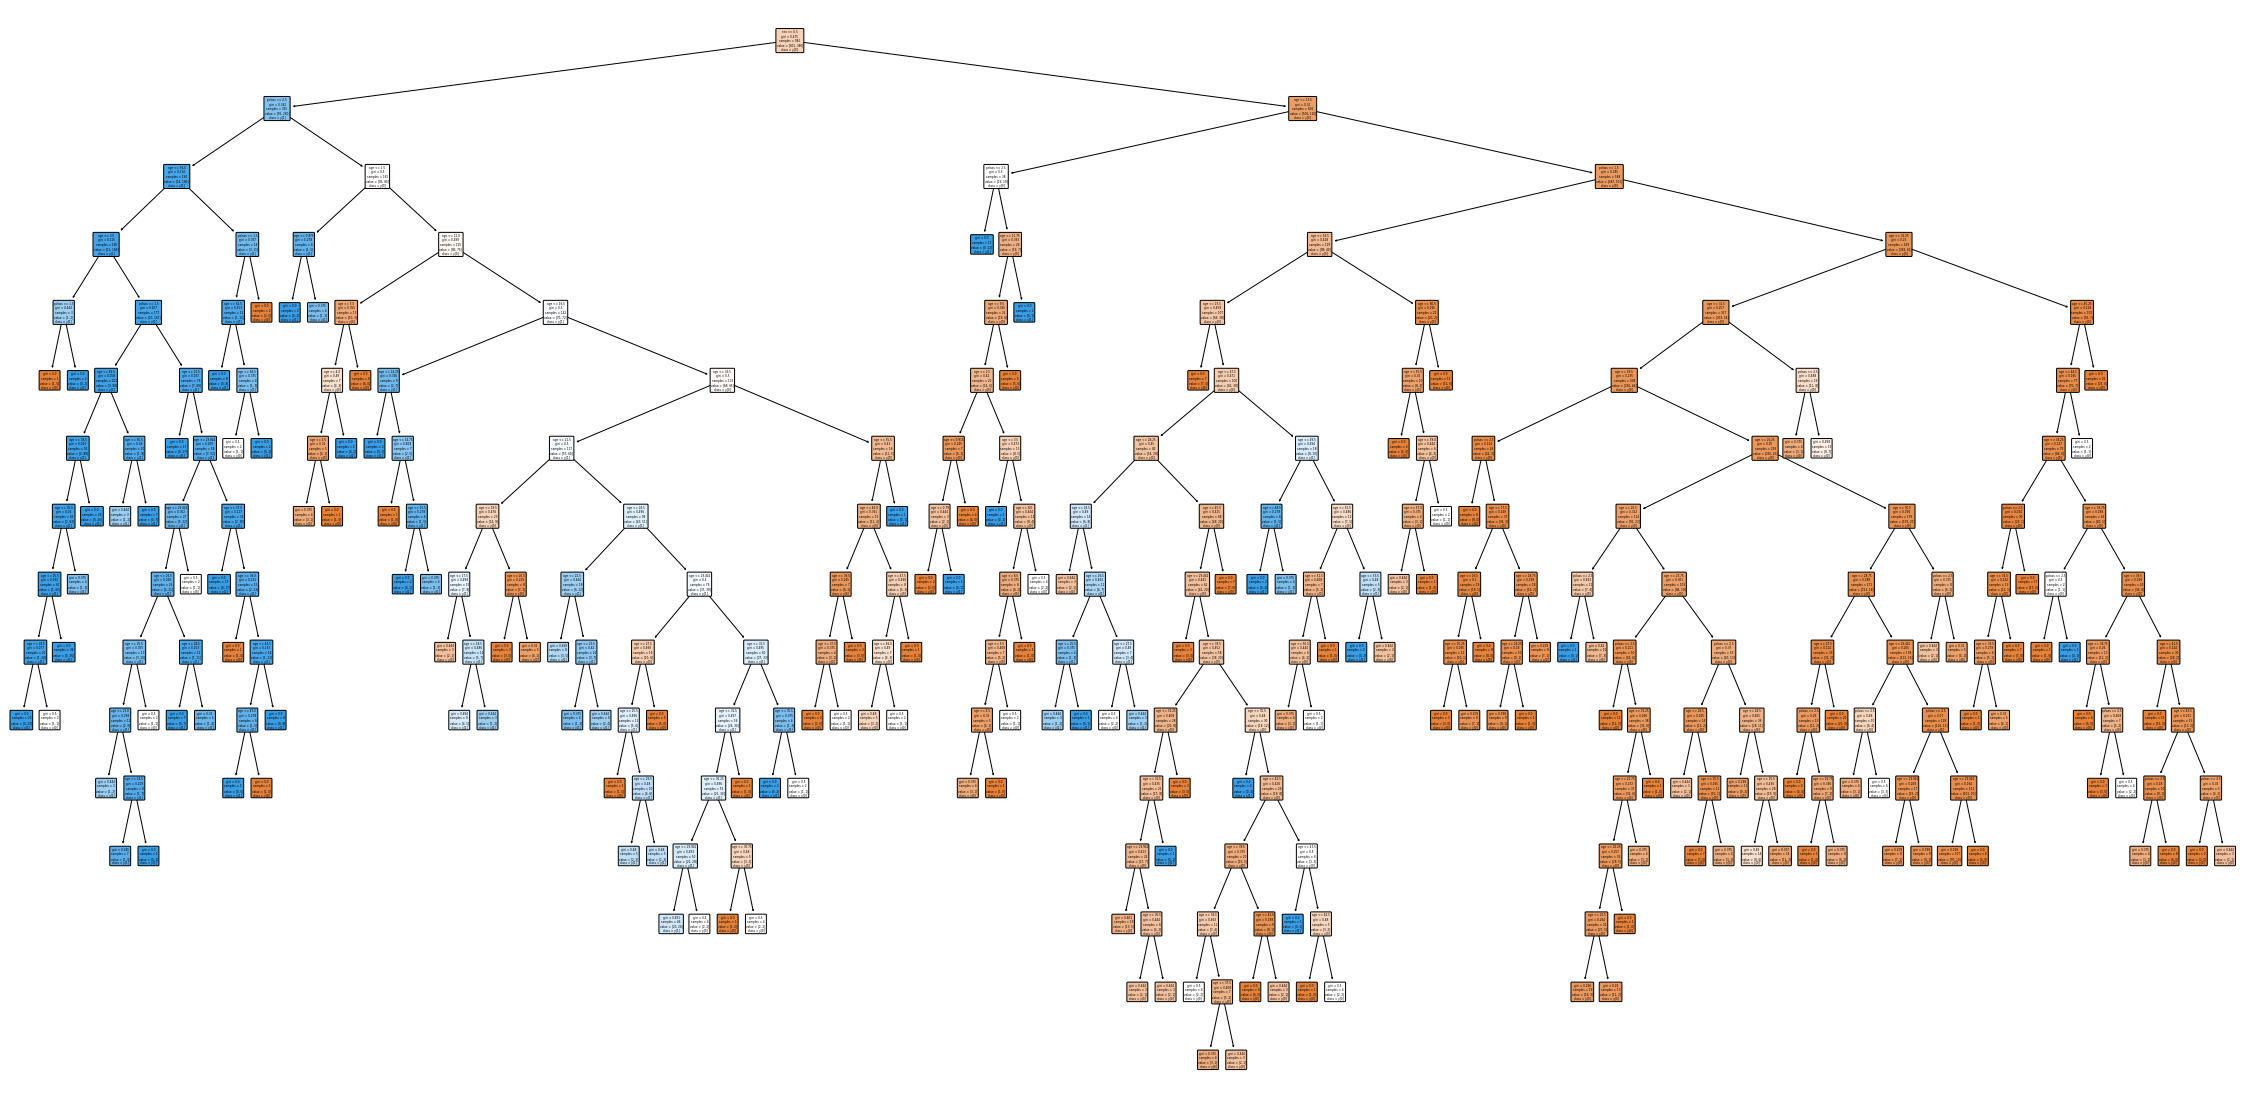

In [6]:
#After prunning 

after_prunning_classifier=DecisionTreeClassifier(random_state=0,max_depth=15)
after_prunning_classifier.fit(X_train,y_train)

rcParams['figure.figsize']=40,20
tree.plot_tree(after_prunning_classifier,feature_names=X.columns,filled=True,rounded=True,class_names=True)
plt.show()





In [7]:
#Before prunning cross validation
print(f"Before prunning cross validation Accuracy Scores  :{crossValScores.mean()}\n")
#After prunning cross validation
after_prunning_cross_validation_scores=cross_val_score(after_prunning_classifier,X,y,cv=10)
print(f"after prunning cross validation Accuracy Scores : {after_prunning_cross_validation_scores.mean()}\n")


Before prunning cross validation Accuracy Scores  :0.7356136230182032

after prunning cross validation Accuracy Scores : 0.7356136230182032



# 2.5. Compare the final tree with logistic regression and comment on the advantages and disadvantages of both. Which model is best for competing in the Kaggle competition?

In [8]:
#After prunning cross validation

after_prunning_cross_validation_scores=cross_val_score(after_prunning_classifier,X,y,cv=10)
print(f"after prunning cross validation is {after_prunning_cross_validation_scores.mean()}")


after prunning cross validation is 0.7356136230182032


In [9]:
#references : https://medium.com/@lily_su/logistic-regression-accuracy-cross-validation-58d9eb58d6e6

#fitting logistic regression

logistic=LogisticRegression()

logistic.fit(X_train, y_train)
threshold = 0.5
# logistic.predict(X_test)



In [10]:
#logistic regression cross validation
scores = cross_val_score(logistic, X, y, cv=10)

print(f"Logistic regression cross-validation-Mean : {scores.mean()}\n")

print(f" Classifier after prunning cross validation-Mean is : {after_prunning_cross_validation_scores.mean()}\n")


Logistic regression cross-validation-Mean : 0.7532413388138579

 Classifier after prunning cross validation-Mean is : 0.7356136230182032




According to the results above, The logistic regression has high performance such that it has the highest cross validation mean ( 0.7532413388138579) compare to 0.7356136230182032 of DecisionTreeClassifier after prunning. Therefore Logistic regression can be used on Kaggle. 


Please find the extra explanation for this question in the report. 


# Q3. Classification using KNN

# 3.1 By focusing on small neighborhoods of state space it is possible to construct parsimonious models. Describe the concept behind this general approach and a step-by-step procedure for implementing such a model.

The answer for the above question(1.5) can be found in the report


# 3.2 Consider the challenge of classifying the likelihood of survival using the Titanic dataset. To construct a KNN classifier, how will you transform the available variables?

In [11]:
from sklearn.neighbors import KNeighborsClassifier

#loading the dataset
titanic_address="titanic3.csv"
titanic_data=pd.read_csv(titanic_address)
titanic_data=titanic_data.filter(["pclass","survived","sex","age"])

#filtering explanatory variables and dependent variable in the dataset
X=titanic_data.filter(['pclass','sex','age'])
X['sex'] = X['sex'].replace(to_replace={'male':1,'female':0})
y=titanic_data['survived']

#checking if explanatory variables contains null values and where we find it , we will replace it by the mean of that column
X.isnull().sum()
X['age']=X['age'].fillna(X['age'].mean())


#3 Splitting the dataset into the Training set and Test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


# Make an instance of the Model
knn_classifier = KNeighborsClassifier(n_neighbors=10) 

# Train the model on the data

knn_classifier.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=10)

# 3.3 Calculate the performance of the classifier versus the number of neighbors used and provide a graphic to display the result. What is the optimal number of neighbors using cross-validation?

In [12]:
#KNeighborsClassifier cross validation

knn_accuracy_score_list=[]
neighbors_list=[1,2,3,4,5,6,7,8,9,10,15,20]
for value in neighbors_list:
    knn_classfier=KNeighborsClassifier(n_neighbors=value)
    knn_classfier.fit(X_train,y_train)
    knn_cross_validation_scores=cross_val_score(knn_classfier,X,y,cv=10)
    knn_accuracy_score_list.append(knn_cross_validation_scores.mean())
                               
print(knn_accuracy_score_list)

[0.708162066940693, 0.7463358778625955, 0.7272519083969466, 0.7471168526130357, 0.737204932472108, 0.7363711098062244, 0.7356723429242513, 0.7516911332941868, 0.7440751614797417, 0.7386611861421023, 0.7097005284791545, 0.6913799177921316]


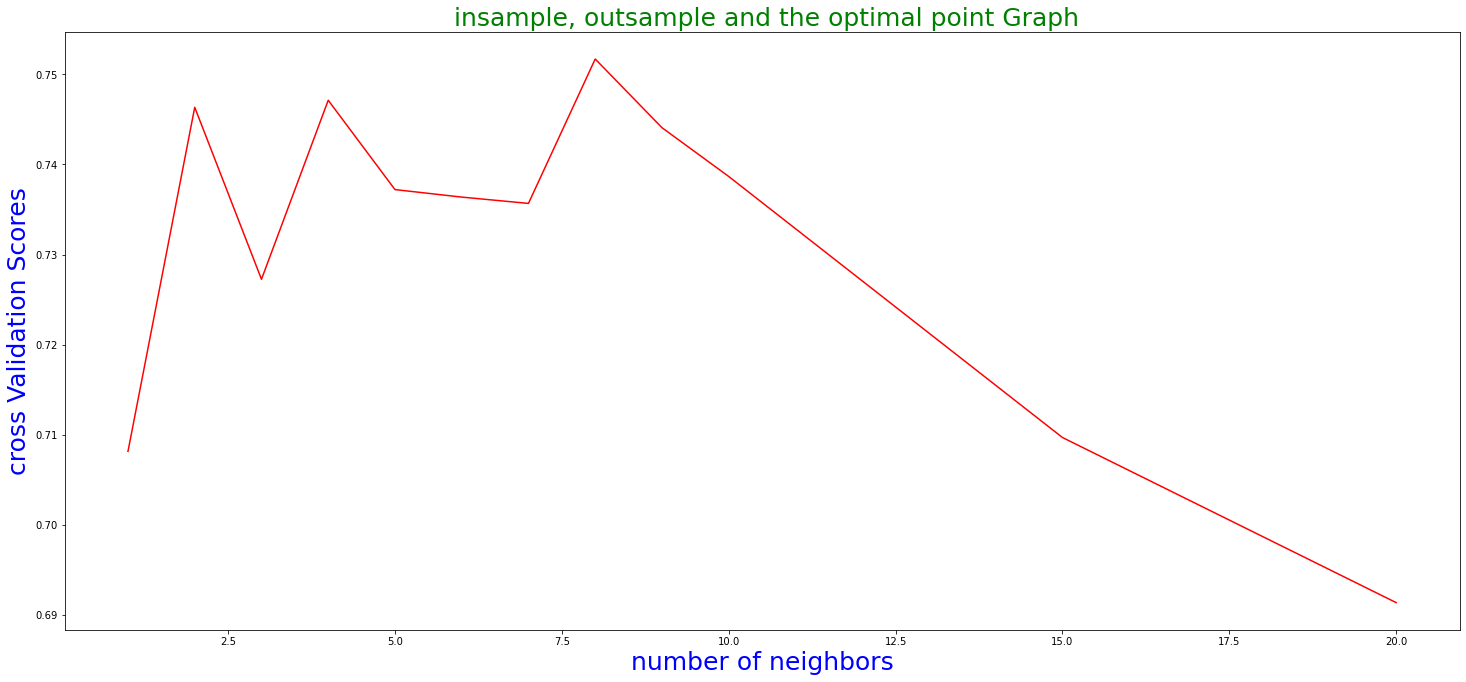

In [13]:
#displaying the results above

rcParams["figure.figsize"] = 25,11
plt.plot(neighbors_list, knn_accuracy_score_list,color="red")
plt.xlabel("number of neighbors", size = 25,color="blue")
plt.ylabel("cross Validation Scores", size = 25, color="blue")
plt.title(" insample, outsample and the optimal point Graph", size = 25,color="green")
plt.show()

In [14]:
# the optimal number of neighbors using cross-validation
optimal_number=max(knn_accuracy_score_list)
optimal_number_index=knn_accuracy_score_list.index(optimal_number)+1
print(f"The optimal number of neighbors is : {optimal_number_index}")
    

    

The optimal number of neighbors is : 8


# 3.4 Explain why some distance metrics are sensitive to the kind of features used. Evaluate the performance using different distance metrics.

In [15]:
# Evaluate the performance using different distance metrics

# Training the K-NN model using  hamming metric
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score


hamming_classifier = KNeighborsClassifier(n_neighbors = 8, metric = 'hamming')
hamming_classifier.fit(X_train, y_train)

hamming_cross_Val_scores = cross_val_score(hamming_classifier, X, y, cv=10)


# Predicting the Test set results
y_pred = hamming_classifier.predict(X_test)

# Making the Confusion Matrix
hamming_confusion_matrix = confusion_matrix(y_test, y_pred)
hamming_accuracy_score = accuracy_score(y_test, y_pred)

print(f"The hamming confusion matrix is:\n\n{hamming_confusion_matrix}\n")
print(f"The hamming accuracy score is : {hamming_accuracy_score}\n")
print(f"hamming Cross_validation score: {hamming_cross_Val_scores.mean()}")


The hamming confusion matrix is:

[[160  48]
 [ 45  75]]

The hamming accuracy score is : 0.7164634146341463

hamming Cross_validation score: 0.6562771579565473


In [16]:
# Training the K-NN model using manhattan metric
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix,accuracy_score

manhattan_classifier = KNeighborsClassifier(n_neighbors = 8, metric = 'manhattan')
manhattan_classifier.fit(X_train, y_train)

manhattan_cross_val_scores = cross_val_score(manhattan_classifier, X, y, cv=10)


# Predicting the Test set results
y_pred = manhattan_classifier.predict(X_test)

# Making the Confusion Matrix

manhattan_confusion_matrix = confusion_matrix(y_test, y_pred)
manhattan_accuracy_score = accuracy_score(y_test, y_pred)


print(f"The manhattan confusion matrix is:\n\n{manhattan_confusion_matrix}\n")
print(f"The manhattan accuracy score is : {manhattan_accuracy_score}\n")
print(f"manhattan Cross_validation score: {manhattan_cross_val_scores.mean()}")






The manhattan confusion matrix is:

[[201   7]
 [ 66  54]]

The manhattan accuracy score is : 0.7774390243902439

manhattan Cross_validation score: 0.7532178508514387


In [17]:
# Training the K-NN model using euclidean metric

import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score

euclidean_classifier = KNeighborsClassifier(n_neighbors = 8, metric = 'euclidean')
euclidean_classifier.fit(X_train, y_train)

euclidean_cross_val_scores = cross_val_score(euclidean_classifier, X, y, cv=10)

# Predicting the Test set results
y_pred = euclidean_classifier.predict(X_test)

# Making the Confusion Matrix
euclidean_confusion_matrix = confusion_matrix(y_test, y_pred)
euclidean_accuracy_score = accuracy_score(y_test, y_pred)

print(f"The euclidean confusion matrix is:\n{euclidean_confusion_matrix}\n")
print(f"The euclidean accuracy score is : {euclidean_accuracy_score}")
print(f"euclidean metric Cross_validation score: {euclidean_cross_val_scores.mean()}")

The euclidean confusion matrix is:
[[201   7]
 [ 66  54]]

The euclidean accuracy score is : 0.7774390243902439
euclidean metric Cross_validation score: 0.7516911332941868


In [18]:

# Training the K-NN model using  chebyshev metric
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score


chebyshev_classifier = KNeighborsClassifier(n_neighbors = 8, metric = 'chebyshev')
chebyshev_classifier.fit(X_train, y_train)

chebyshev_cross_val_scores = cross_val_score(chebyshev_classifier, X, y, cv=10)


# Predicting the Test set results
y_pred = chebyshev_classifier.predict(X_test)

# Calculating  the Confusion Matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
accuracy_score = accuracy_score(y_test, y_pred)
print(f"The confusion matrix is:\n{confusion_matrix}\n")
print(f"The accuracy score is : {accuracy_score}")
print(f"chebyshev metric Cross_validation score: {chebyshev_cross_val_scores.mean()}")

The confusion matrix is:
[[194  14]
 [ 72  48]]

The accuracy score is : 0.7378048780487805
chebyshev metric Cross_validation score: 0.700540223135643


## 3.5 Compare the best KNN classifier with logistic regression and comment on the advantages and disadvantages of both. Which model is best for competing in the Kaggle competition?

In [19]:

#best KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors = 8)
knn_classifier.fit(X_train, y_train)
knn_cross_val_scores = cross_val_score(knn_classifier, X, y, cv=10).mean()
print(f'KNN classifier cross_validation Score: {knn_cross_val_scores}\n')


logistic = LogisticRegression()

logistic.fit(X_train, y_train)


#cross validation using logistic regression 
logistic_cross_val_scores = cross_val_score(logistic, X, y, cv=10).mean()
# Logstc_cros_val_score2 = Logstc_cros_val_scores.mean()

#finding the   cross_validation Score with logistic regression
print(f'Logistic regression cross_validation Score: {logistic_cross_val_scores}')

KNN classifier cross_validation Score: 0.7516911332941868

Logistic regression cross_validation Score: 0.7532413388138579


Based on cross validation score above, The model with high cross validation score, is the one to be used on kaggle. Therefore, Logistic regression is best model to be used on kagggle such that it has the highest cross validation score (0.7532413388138579)

# Q4. Regression – wine quality

# 4.1 Calculate the average of each feature for the red and white wines separately and make a comparison using a bar graph showing the two wines together. How do the results relate to common sense (or the intuition of a wine expert) based on the features that are available?

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier

red_wine_quality_address="winequality-red.csv"

red_wine_quality_data = pd.read_csv(red_wine_quality_address, delimiter=";")

red_wine_quality_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [21]:
#reading white wine quality data
white_wine_quality_address="winequality-white.csv"

white_wine_quality_data = pd.read_csv(white_wine_quality_address, delimiter=";")

white_wine_quality_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7



red wine means:

[8.319637273295838, 0.5278205128205131, 0.2709756097560964, 2.5388055034396517, 0.08746654158849257, 15.874921826141339, 46.46779237023139, 0.9967466791744831, 3.311113195747343, 0.6581488430268921, 10.422983114446502, 5.6360225140712945]


white wine means:

[6.854787668436075, 0.27824111882401087, 0.33419150673743736, 6.391414863209486, 0.0457723560636995, 35.30808493262556, 138.36065741118824, 0.9940273764801896, 3.1882666394446693, 0.4898468762760325, 10.514267047774638, 5.87790935075541]



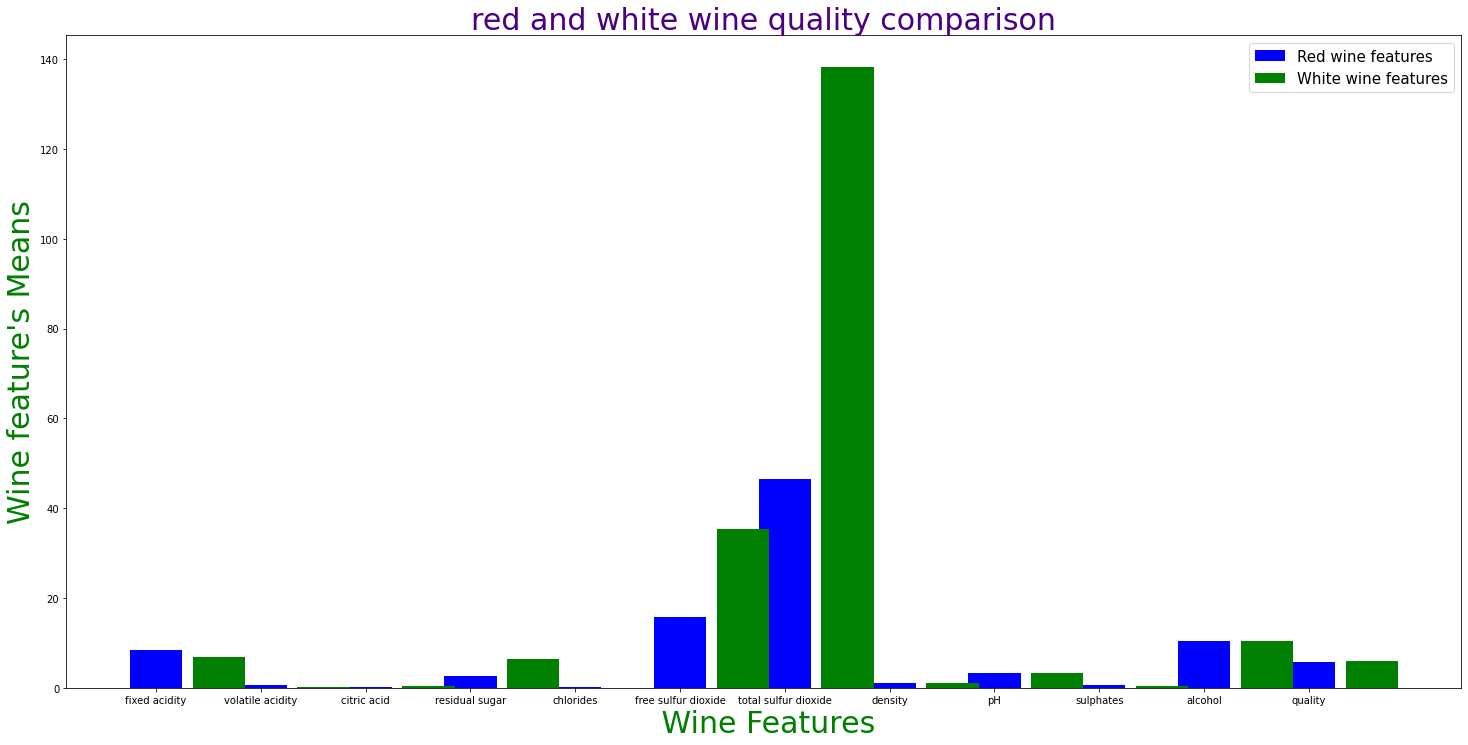

In [22]:
red_wine_mean=[]
white_wine_mean=[]
for value in red_wine_quality_data.columns:
    mean=red_wine_quality_data[value].mean()
    red_wine_mean.append(mean)

for value in white_wine_quality_data.columns:
    mean=white_wine_quality_data[value].mean()
    white_wine_mean.append(mean)

print(f'\nred wine means:\n\n{red_wine_mean}\n\n')
print(f'white wine means:\n\n{white_wine_mean}\n')

plt.figure(figsize=(25,12))
plt.bar(np.arange(12),red_wine_mean, width = 0.5, label = "Red wine features",color = "blue")
plt.bar(np.arange(12)+0.6,white_wine_mean, width = 0.5, label = "White wine features",color = "green")
plt.xticks(np.arange(12),red_wine_quality_data.columns)
plt.xlabel(" Wine Features", size = 30,color='green')
plt.ylabel("Wine feature's Means", size = 30,color='green')
plt.title('red and white wine quality comparison',color='indigo',size=30)
plt.legend(fontsize = 15)

plt.show()

# 4.2 What is the correlation between each feature and the dependent variable using a separate analysis for white and red wine? Which variable is most relevant for each wine?

In [23]:

#The correlation matrix for white wine quality is :
white_wine_quality_data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


In [24]:

#The correlation matrix for red wine quality is :
red_wine_quality_data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


# Which variable is most relevant for each wine

The further away the correlation coefficient is from zero, the stronger the relationship between the two variables.

For red wine quality , alcohol variable is a relevant variable compared with other variables since it has a high correlation coefficient of 0.476166.

For white wine quality, alcohol variable is also a relevant variable compared with other variables such that it has a high correlation coefficient  which  is 0.435575.

# 4.3 Use Lasso and cross-validation to provide a plot of MSE against lambda and the parameter estimates versus lambda. How do the features selected by LASSO compare with an approach of setting a threshold on the absolute correlation coefficient?

In [25]:
#White wine data set 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
X_white_wine=white_wine_quality_data.drop(columns=['quality'])
y_white_wine=white_wine_quality_data.filter(['quality'])
X_white_wine.isnull().sum()
y_white_wine.isnull().sum()

X_white_train, X_white_test, y_white_train, y_white_test = train_test_split(X_white_wine, y_white_wine, test_size=0.25, random_state=0)


In [26]:
#red wine data set 
X_red_wine=red_wine_quality_data.drop(columns=['quality'])
y_red_wine=red_wine_quality_data.filter(['quality'])
X_red_wine.isnull().sum()
y_red_wine.isnull().sum()

X_red_train, X_red_test, y_red_train, y_red_test = train_test_split(X_red_wine, y_red_wine, test_size=0.25, random_state=0)

In [27]:
#white wine data set

# Lasso with different lambdas
lambdas = (0.001, 0.01, 0.1, 0.5, 1, 2, 10)
lambdas_number = 7
prediction_number = X_white_wine.shape[1]

# prepare data for enumerate
white_coeff_a = np.zeros((lambdas_number, prediction_number))
train_mean_squared_error = np.zeros(lambdas_number)
test_mean_squared_error = np.zeros(lambdas_number)

# enumerate through lambdas with index and value
for ind, value in enumerate(lambdas):    
    lasso_reg = Lasso(alpha = value)
    lasso_reg.fit(X_white_train, y_white_train)

    white_coeff_a[ind] = lasso_reg.coef_
    train_mean_squared_error[ind] = lasso_reg.score(X_white_train, y_white_train)
    test_mean_squared_error[ind] = mean_squared_error( y_white_test,lasso_reg.predict(X_white_test))
    
    


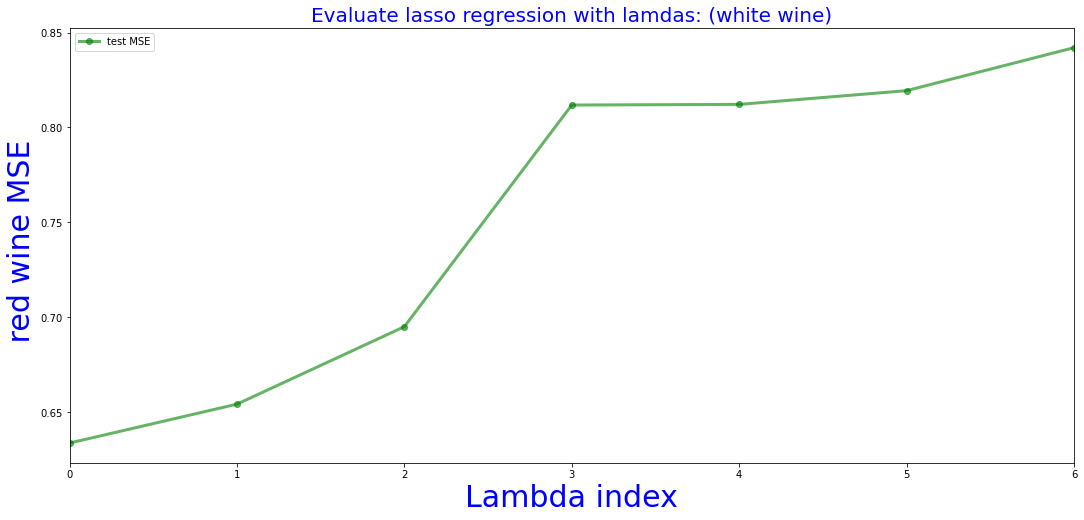

In [28]:
# Plotting mean squared error versus Lambdas for white wine
plt.figure(figsize=(18, 8))
plt.plot(test_mean_squared_error, 'bo-', label=r'test MSE', color="green", alpha=0.6, linewidth=3)
plt.xlabel('Lambda index',size=30,color="blue")
plt.ylabel(r' red wine MSE',size=30,color="blue")
plt.xlim(0, 6)
plt.title(r'Evaluate lasso regression with lamdas: (white wine)',size=20,color='blue')
plt.legend(loc='best')
plt.show()

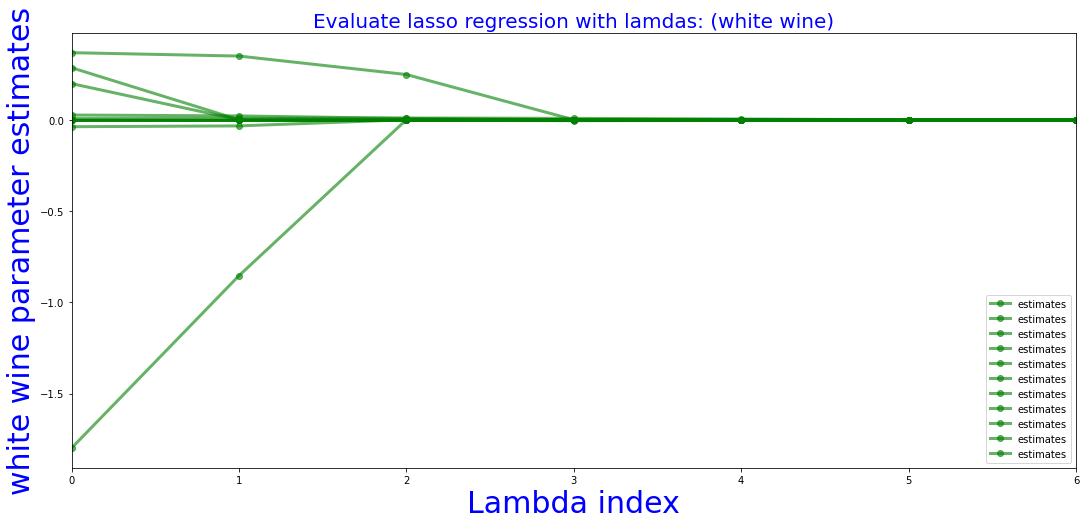

In [29]:
# Plotting mean squared error versus Lambdas
plt.figure(figsize=(18, 8))
plt.plot(white_coeff_a, 'bo-', label='estimates', color="green", alpha=0.6, linewidth=3)
plt.xlabel('Lambda index',size=30,color="blue")
plt.ylabel(r'white wine parameter estimates',size=30,color="blue")
plt.xlim(0, 6)
plt.title(r'Evaluate lasso regression with lamdas: (white wine)',size=20,color='blue')
plt.legend(loc='best')
plt.show()

In [30]:
# Lasso with different lambdas
lambdas = (0.001, 0.01, 0.1, 0.5, 1, 2, 10)
lambdas_number = 7
prediction_number = X_red_wine.shape[1]

# prepare data for enumerate
red_coeff_a = np.zeros((lambdas_number, prediction_number))
red_train_mean_squared_error = np.zeros(lambdas_number)
red_test_mean_squared_error = np.zeros(lambdas_number)

# enumerate through lambdas with index and i
for ind, value in enumerate(lambdas):    
    lasso_reg = Lasso(alpha = value)
    lasso_reg.fit(X_red_train, y_red_train)

    red_coeff_a[ind] = lasso_reg.coef_
    red_train_mean_squared_error[ind] = lasso_reg.score(X_red_train, y_red_train)
    red_test_mean_squared_error[ind] = mean_squared_error( y_red_test,lasso_reg.predict(X_red_test))


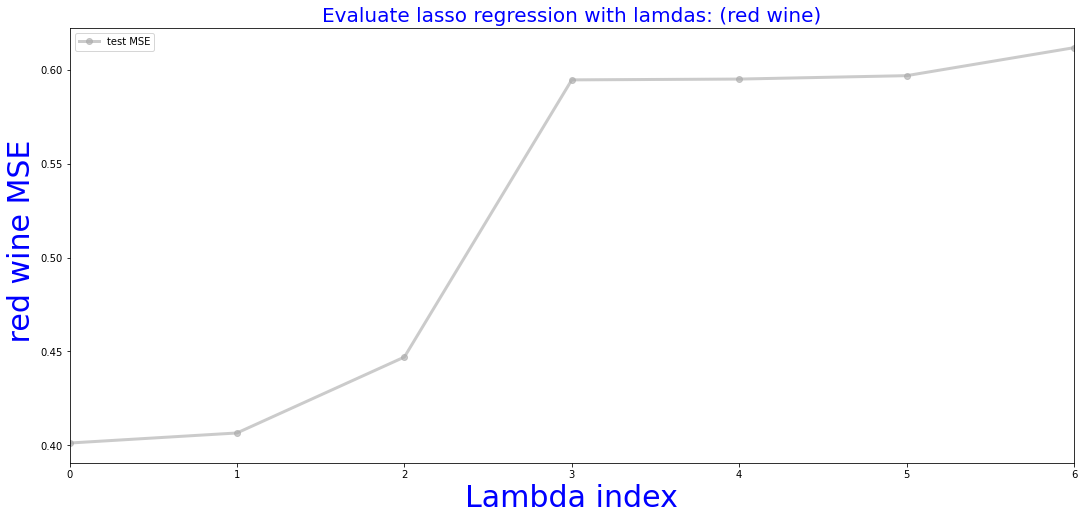

In [31]:
# Plotting mean squared error versus Lambdas
plt.figure(figsize=(18, 8))

plt.plot(red_test_mean_squared_error, 'bo-', label=r'test MSE', color="darkgrey", alpha=0.6, linewidth=3)
plt.xlabel('Lambda index',size=30,color="blue")
plt.ylabel(r' red wine MSE',size=30,color="blue")
plt.xlim(0, 6)
plt.title(r'Evaluate lasso regression with lamdas: (red wine)',size=20,color='blue')
plt.legend(loc='best')
plt.show()

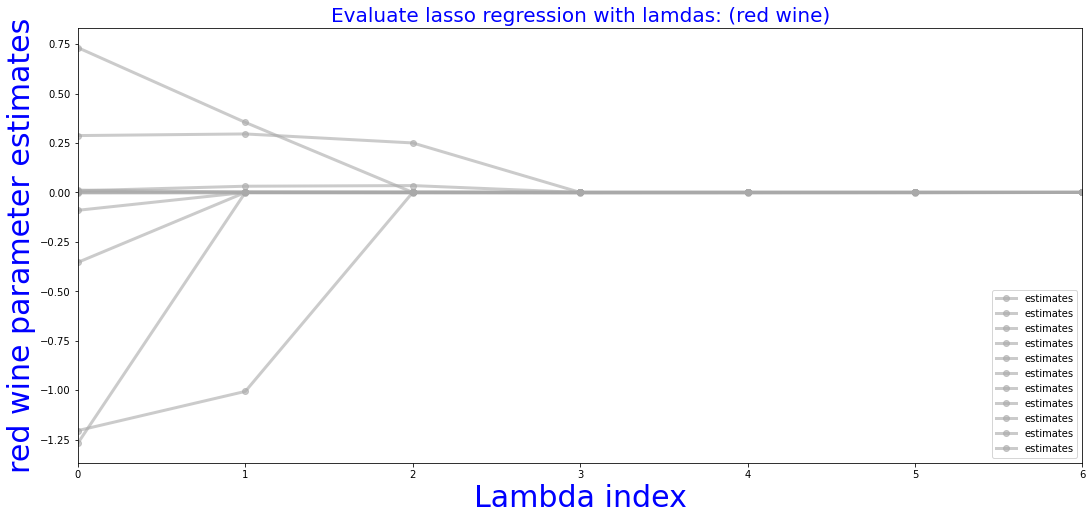

In [32]:
# Plotting mean squared error versus Lambdas
plt.figure(figsize=(18, 8))

plt.plot(red_coeff_a, 'bo-', label=r'estimates', color="darkgrey", alpha=0.6, linewidth=3)
plt.xlabel('Lambda index',size=30,color="blue")
plt.ylabel(r'red wine parameter estimates',size=30,color="blue")
plt.xlim(0, 6)
plt.title(r'Evaluate lasso regression with lamdas: (red wine)',size=20,color='blue')
plt.legend(loc='best')
plt.show()

# 4.4 Use the features identified by LASSO to construct a KNN regression model for red wine.

In [33]:
from sklearn.linear_model import LassoCV

X_red_train, X_red_test , y_red_train, y_red_test = train_test_split(X_red_wine, y_red_wine, test_size=0.25, random_state=1)

lasso= LassoCV(alphas =lambdas , cv = 10, max_iter = 100000, normalize = True)
lasso.fit(X_red_train, y_red_train)
y_red_predict_lasso=lasso.predict(X_red_test)
print(pd.Series(lasso.coef_, index=X_red_wine.columns))



fixed acidity           0.000000
volatile acidity       -1.100328
citric acid             0.000000
residual sugar         -0.000000
chlorides              -0.755449
free sulfur dioxide     0.000000
total sulfur dioxide   -0.001620
density                -0.000000
pH                     -0.146524
sulphates               0.566763
alcohol                 0.271471
dtype: float64


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [34]:
features_selected = X_red_wine.columns[(lasso.coef_ != 0).tolist()]
features_selected 




Index(['volatile acidity', 'chlorides', 'total sulfur dioxide', 'pH',
       'sulphates', 'alcohol'],
      dtype='object')

In [35]:
x_red_wine_selected = red_wine_quality_data[['volatile acidity', 'chlorides', 'total sulfur dioxide', 'pH',
       'sulphates', 'alcohol']]

# 4.5 What is the performance of a linear regression model and the KNN model, measured by MSE and R2? Describe the advantages and disadvantages of both models.

In [37]:
from sklearn.linear_model import LinearRegression

#Create KNN Classifier
from sklearn.metrics import confusion_matrix, accuracy_score,mean_squared_error,r2_score


knn_red_wine = KNeighborsClassifier()
knn_red_wine.fit(x_red_wine_selected, y_red_wine)
#y_pred_test_knn = knn.predict(X_test)
y_predict_red_knn=knn_red_wine.predict(x_red_wine_selected)
red_wine_mse_knn=mean_squared_error(y_red_wine,y_predict_red_knn)
knn_r2_score=r2_score(y_red_wine,y_predict_red_knn)

#linear regression
regressor = LinearRegression()
regressor.fit(x_red_wine_selected, y_red_wine)
y_predict_red_regression=regressor.predict(x_red_wine_selected)

mse_regression_red=mean_squared_error(y_red_wine,y_predict_red_regression)
logistic_r2_score=r2_score(y_red_wine,y_predict_red_regression)

print(f'The MSE of KNN  is : {red_wine_mse_knn}\n')
print(f'The R2 of KNN  is : {knn_r2_score}\n')
print(f'The MSE OF Linear regression is :  {mse_regression_red}\n')
print(f'The R2 of Linear regression  is : {logistic_r2_score}\n')

The MSE of KNN  is : 0.4721701063164478

The R2 of KNN  is : 0.27554665024825653

The MSE OF Linear regression is :  0.4189688501911807

The R2 of Linear regression  is : 0.35717364800893114



C:\Users\Hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
